In [29]:
from tools import get_patient

import os, requests
from matplotlib import rcParams 
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn import preprocessing


In [30]:
patient = get_patient(2)
signals = patient['V']

nchan = signals.shape[1] #Number of channels
nt = signals.shape[0]    #Number of data points
corr_chan = sorted([5, 23, 22, 20, 17, 1, 25]) #Highest movement correlated channels, as found by ecog joystick analysis


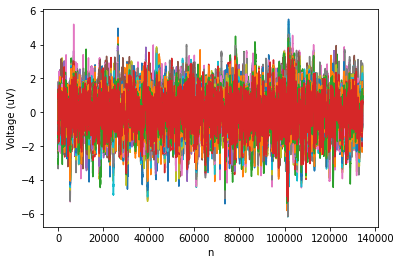

In [31]:
# Visualise signal
plt.plot(signals)
plt.xlabel('n')
plt.ylabel('Voltage (uV)')
plt.show()

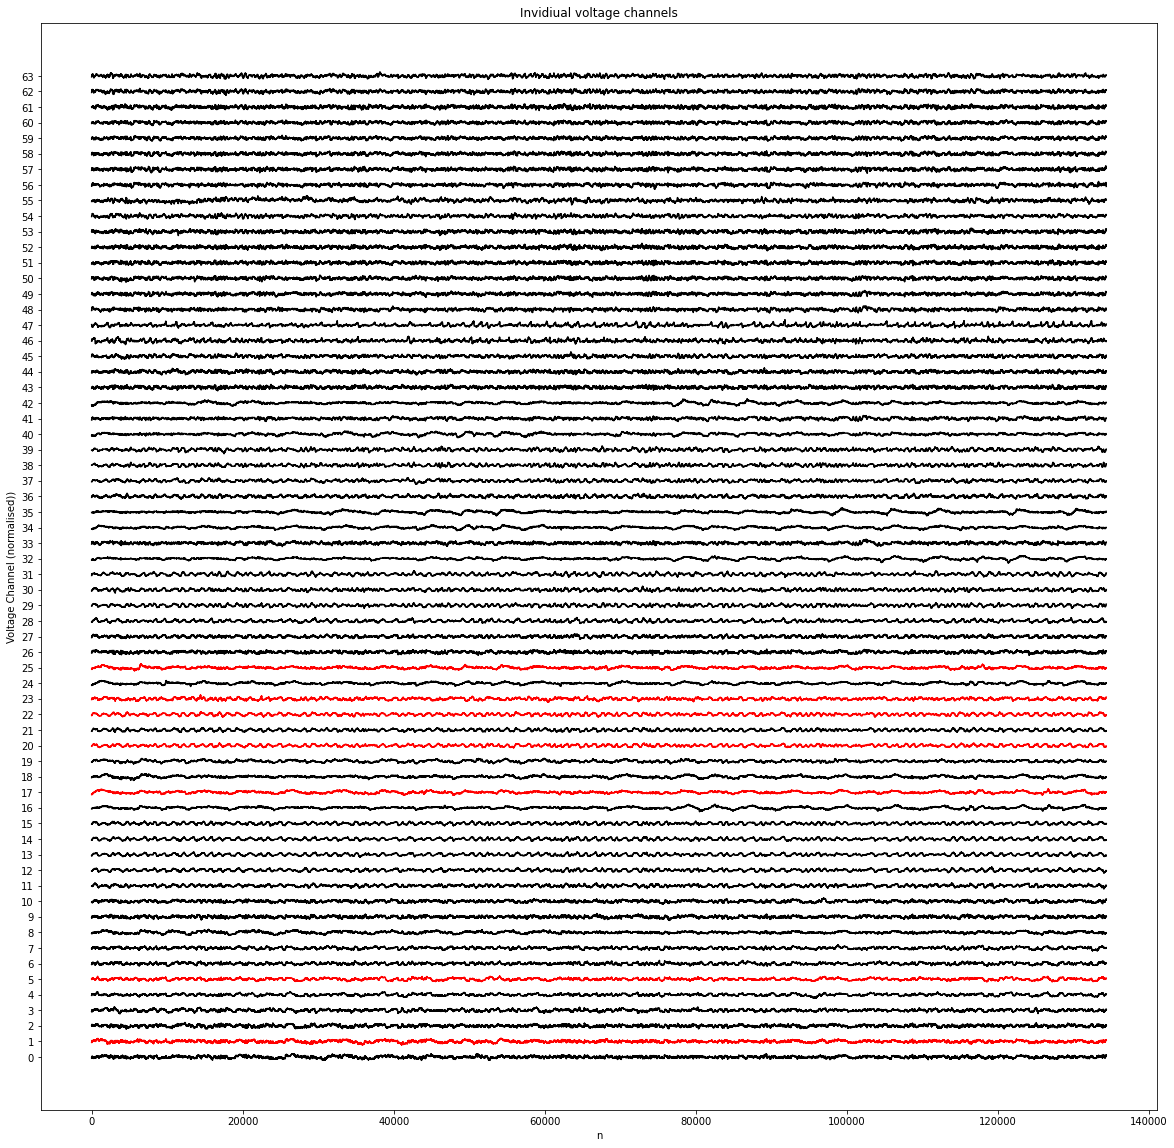

In [32]:
# Normalised Voltage Visualisation for all patients, compared with dependent variable cursor position
V_norm = preprocessing.normalize(signals)

#number of signals to plot (nchan + target X,Y + cursor X,Y)
signals_stacked = dict()
for c in range(nchan):
    signals_stacked['V' + str(c)] = V_norm[:,c].flatten()



plt.figure(figsize=(20, 20))
for i, (label, V) in enumerate(signals_stacked.items()):
    if i in corr_chan: color = 'r'
    else: color = 'k'
    plt.plot(V + i*2, color=color)

#plt.xlim(50000, 100000)
plt.title('Invidiual voltage channels')
plt.xlabel('n')
plt.ylabel('Voltage Channel (normalised))')
plt.yticks(np.arange(0, nchan*2, step=2), range(nchan))
plt.show()



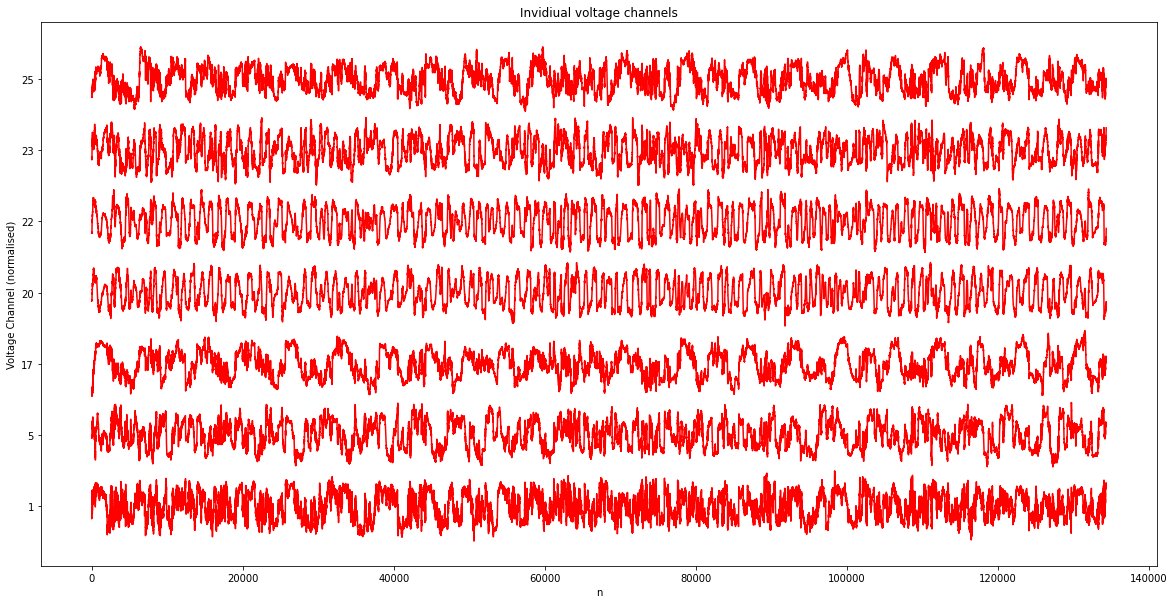

In [33]:
signals_filtered = signals[:, corr_chan]
# Normalised Voltage Visualisation for all patients, compared with dependent variable cursor position
V_norm = preprocessing.normalize(signals_filtered)

#number of signals to plot (nchan + target X,Y + cursor X,Y)
signals_stacked = dict()
for c in range(signals_filtered.shape[1]):
    signals_stacked['V' + str(c)] = V_norm[:,c].flatten()

plt.figure(figsize=(20, 10))
for i, (label, V) in enumerate(signals_stacked.items()):
    plt.plot(V + i*2, color='r')

#plt.xlim(50000, 100000)
plt.title('Invidiual voltage channels')
plt.xlabel('n')
plt.ylabel('Voltage Channel (normalised)')
plt.yticks(np.arange(0, len(corr_chan)*2, step=2), corr_chan)
plt.show()

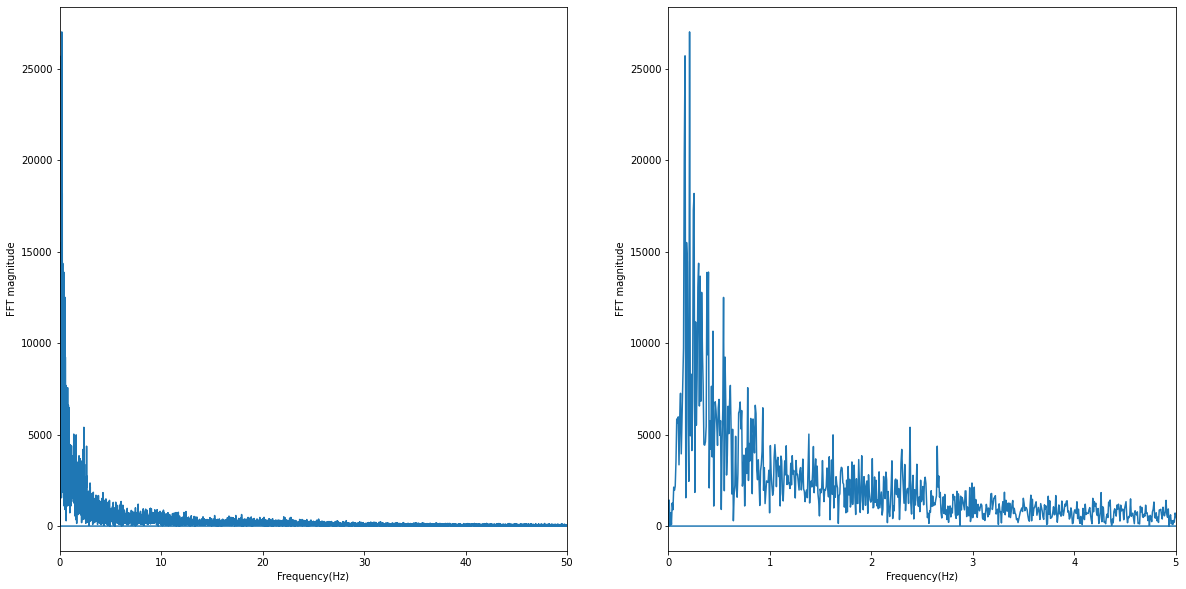

In [44]:
signal = signals_filtered[:, -1]

sig_fft = np.fft.fft(signal)
fs = 1000
freqs = np.fft.fftfreq(len(signal), 1/fs)
fft_abs = np.abs(sig_fft)

plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.plot(freqs, np.abs(sig_fft))
plt.xlim([0, 50])
plt.ylabel('FFT magnitude')
plt.xlabel('Frequency(Hz)')
plt.subplot(1, 2, 2)
plt.plot(freqs, fft_abs)
plt.xlim([0, 5])
plt.ylabel('FFT magnitude')
plt.xlabel('Frequency(Hz)')
plt.show()



In [45]:
bps = 2.066666666666667 #Beats per seconds in Hz for 124bpm

filter_freqs = dict()
filter_freqs['breve'] = bps/4
filter_freqs['minim'] = bps/2
filter_freqs['crotchet'] = bps
filter_freqs['quaver'] = bps*2
filter_freqs['triplet'] = bps*3
filter_freqs['semi_quaver'] =bps*4



In [102]:
def find_nearest(array, value):
    idx = (np.abs(array - value)).argmin()
    return idx

def filter(fft, freqs, filter_freq):
    ifreq = find_nearest(freqs, filter_freq)
    window = 10
    ifreq_floor = int(ifreq - np.floor(window/2))
    ifreq_ceil = int(ifreq + np.ceil(window/2))
    fft_filt = np.zeros((fft.shape))
    fft_filt[ifreq_floor:ifreq_ceil] = fft[ifreq_floor:ifreq_ceil]
    plt.plot(freqs, fft_filt)
    plt.xlim(0, 20)
    
    signal_filtered = np.fft.ifft(fft_filt)
    signal_filtered = np.asarray(signal_filtered, float)
    plt.figure(figsize=(20, 10))
    plt.subplot(1, 2, 1)
    plt.plot(signal_filtered)
    plt.xlabel('n')
    plt.ylabel('Filtered Voltage at ' + str(filter_freq) + 'Hz')
    plt.subplot(1, 2, 2)
    plt.plot(signal_filtered)
    plt.xlim(12500, 13500)
    plt.xlabel('n')
    
    return signal_filtered

C:\Users\richa\AppData\Local\Temp\ipykernel_22808\3041446273.py:16: ComplexWarning: Casting complex values to real discards the imaginary part
  signal_filtered = np.asarray(signal_filtered, float)


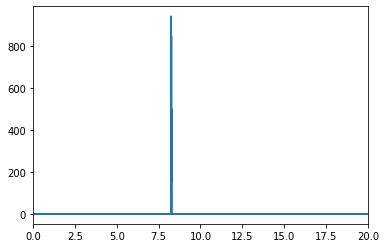

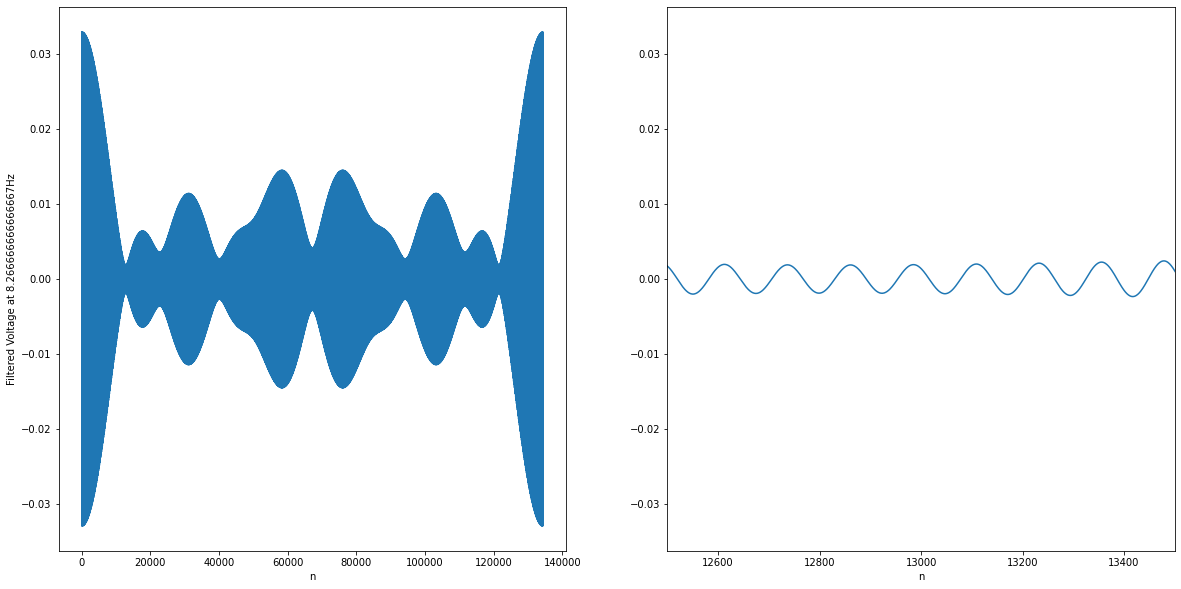

In [103]:
signal_filtered = filter(fft_abs, freqs, filter_freqs['semi_quaver'])

[ 0.          0.00744269  0.01488538 ... -0.02232807 -0.01488538
 -0.00744269]
